![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

H0 : mean number of goals scored in women's international soccer matches is the same as men's.

HA: mean number of goals scored in women's international soccer matches is the not the same as men's.

In [77]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
import seaborn as sns

In [78]:
#Load the dataset
men_results = pd.read_csv('men_results.csv')
print(men_results.head())


women_results = pd.read_csv('women_results.csv')
print(women_results.head())

   Unnamed: 0        date home_team  ... home_score  away_score  tournament
0           0  1872-11-30  Scotland  ...          0           0    Friendly
1           1  1873-03-08   England  ...          4           2    Friendly
2           2  1874-03-07  Scotland  ...          2           1    Friendly
3           3  1875-03-06   England  ...          2           2    Friendly
4           4  1876-03-04  Scotland  ...          3           0    Friendly

[5 rows x 7 columns]
   Unnamed: 0        date home_team  ... home_score  away_score        tournament
0           0  1969-11-01     Italy  ...          1           0              Euro
1           1  1969-11-01   Denmark  ...          4           3              Euro
2           2  1969-11-02   England  ...          2           0              Euro
3           3  1969-11-02     Italy  ...          3           1              Euro
4           4  1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]


In [79]:
# Exploring the dataset

print(men_results.info(),women_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3)

In [80]:
# Value counts of the different tournaments 
print(men_results['tournament'].value_counts())

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64


In [81]:
# Convert the date  columns to datetime
men_results['date'] = pd.to_datetime(men_results['date'])

women_results['date'] = pd.to_datetime(women_results['date'])

print(men_results.info(), women_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4884 non-null   int64         
 1   date        4884 non-null   datetime64[ns]
 2   home_team   4884 non-null   object        
 3   away_team   4884 non-null   object      

Filtering the data

In [82]:
men_results = men_results[(men_results['tournament']=='FIFA World Cup') & (men_results['date'] >= '2002-01-01')]
print(men_results.head())

       Unnamed: 0       date  ... away_score      tournament
25164       25164 2002-05-31  ...          1  FIFA World Cup
25165       25165 2002-06-01  ...          0  FIFA World Cup
25166       25166 2002-06-01  ...          1  FIFA World Cup
25167       25167 2002-06-01  ...          2  FIFA World Cup
25168       25168 2002-06-02  ...          0  FIFA World Cup

[5 rows x 7 columns]


In [83]:
women_results = women_results[(women_results['tournament']=='FIFA World Cup') & (women_results['date']>= '2002-01-01')]
print(women_results.head())

      Unnamed: 0       date  ... away_score      tournament
1600        1600 2003-09-20  ...          3  FIFA World Cup
1601        1601 2003-09-20  ...          0  FIFA World Cup
1602        1602 2003-09-20  ...          1  FIFA World Cup
1603        1603 2003-09-20  ...          0  FIFA World Cup
1604        1604 2003-09-21  ...          1  FIFA World Cup

[5 rows x 7 columns]


Since two samples that are independent are being used here, an unpaired ttest would be used to test our hypothesis..but i need to first determine whether it would be a T-Test(parametric) or a wilcoxon mann whitney test(non parametric)

In [84]:
#Create a team column and goals scored column

men_results['Team'] = 'Men'
women_results['Team'] = 'Women'

men_results['goals_scored'] = men_results['away_score']+men_results['home_score']

women_results['goals_scored'] = women_results['away_score']+women_results['home_score']

In [85]:
#To check if appropriate for a parametric or non-parametric version of unpaired t-test
counts = men_results['goals_scored'].value_counts()
# Inspect whether the counts are big enough
print((counts >= 30).all())


counts = women_results['goals_scored'].value_counts()
# Inspect whether the counts are big enough
print((counts >= 30).all())

False
False


Summary: since all the sample sizes are less than 30, the non parametric version for unpaired TTest will be used

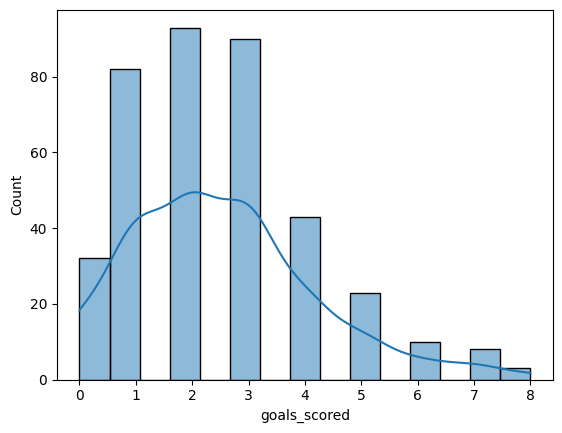

<Figure size 640x480 with 0 Axes>

In [86]:
#Visualization
sns.histplot(men_results['goals_scored'], kde=True)
plt.show()
plt.clf()

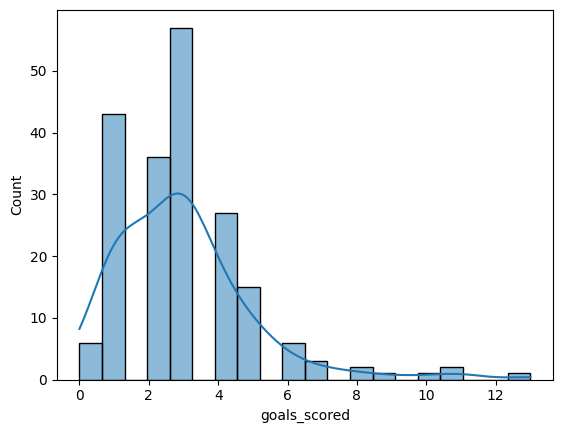

<Figure size 640x480 with 0 Axes>

In [87]:
sns.histplot(women_results['goals_scored'], kde=True)
plt.show()
plt.clf()

Wilxocon Mann Whitney Test

In [88]:
# Append the two tables
tables = pd.concat([men_results,women_results], axis=0, ignore_index=True)

# convert to wide format
subset = tables[["goals_scored", "Team"]]
wide_format = subset.pivot(columns="Team", values="goals_scored")

In [89]:
alpha = 0.1
pingouin.mwu(x=wide_format['Women'], y=wide_format['Men'],alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


The p_value is less than the significant level which indicates that the null hypothesis be rejected. So the number of goals scored by the women in the Fifa world cup is not the same as the men.

In [90]:
p_val = 0.0051066098
result = 'reject'

In [91]:
result_dict = {"p_val": p_val, "result": result}
result_dict

{'p_val': 0.0051066098, 'result': 'reject'}